# Mounting Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


First, because the TotalCharges column is an object, so it need to change to numeric(float)

In [4]:
#Exclude rows wth TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

#transform TotalCharges column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [5]:
#check TotalCharges datatype
df['TotalCharges'].dtypes

dtype('float64')

The TotalCharges column data type has changed to float

##  Preliminary Look and Data Cleansing

In [6]:
# Showing top 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### General Information & Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [8]:
# number of missing values per column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isna().values.sum()} \n")

Rows: 7032 

Features: 21 

Missing Values: 0 



Observation:
* Data contains 21 columns with 7032 rows
* There are no missing value in each column(no Null values)
* All dtypes seem OK (appropriate), given the corresponding column name

## Duplicated data check

In [10]:
# number of duplicated data
df.duplicated().sum()

0

In [11]:
# duplicated rows
df[df.duplicated(keep=False)].sort_values('customerID')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There are no duplicated rows in this dataset.

In [12]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Data understanding

In [41]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [42]:
#Grop column names based on type
numericals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

categoricals = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

## Statistical summary

In [43]:
# numerical statistical sumary
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
* Overall, the minimum and maximum values make sense for each column
* SeniorCitizen column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
* Mean ~ 50% (Median) in tenure, MonthlyCharges, and TotalCharges column, indicating somewhat a skew distribution

In [58]:
# describe method on categorical data
df[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [54]:
# showing the precise value counts
for col in categoricals[1:]:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of gender column
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value counts of Partner column
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value counts of Dependents column
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value counts of PhoneService column
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value counts of MultipleLines column
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

Value counts of InternetService column
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

Value counts of OnlineSecurity column
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

Value counts of OnlineBackup column
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: i

Observations:

* gender have 2 unique values, Male and Female. The number of male customers (3549 rows) is slightly higher than female customers (3483 rows).
* Partner have 2 unique values, Yes and No. The number of customers with no partner (3639 rows) is higher than those with a partner (3393 rows).
* Dependents have 2 unique values, Yes and No. The number of customers with no dependents (4933 rows) is significantly higher than those who with dependents (2099 rows).
* PhoneServic have 2 unique values, Yes and No. The number of customers with phone service (6352 rows) is significantly higher than those without phone service (680 rows).
* MultipleLines have 3 unique values, Yes, No, and No phone service. The number of customers without multiple lines (3385 rows) is higher than with multiple lines (2967 rows), and the number of customers without phone service (680 rows)
* InternetService have 3 unique values, Fiber optic, DSL, and No. The number of customers with Fiber optic internet service (3096 rows) is higher than other
* OnlineSecurity have 3 unique values, Yes, No, and No internet service. The number of customers without online security (3497 rows) is higher than those with online security (2015 rows) and customers without internet service (1520 rows).
* OnlineBackup have 3 unique values, Yes, No, and No internet service. The number of customers without online backup (3087 rows) is higher than those with online backup (2425) and customers without internet service (1520 rows).
* DeviceProtection have 3 unique values, Yes, No, and No internet service. The number of customers without device protection (3094 rows) is higher than those with device protection (2418) and customers without internet service (1520 rows).
* TechSupport have 3 unique values, Yes, No, and No internet service. The number of customers without tech support (3472 rows) is higher than those with tech support (2040) and customers without internet service (1520 rows).
* StreamingTV have 3 unique values, Yes, No, and No internet service. The number of customers without streaming TV service (2809 rows) is almost the same as those with streaming TV service (2703 rows), and customers without internet service (1520 rows) are also noticeable.
* StreamingMovies have 3 unique values, Yes, No, and No internet service. The number of customers without streaming movie service (2781 rows) is almost the same as those with streaming movie service (2731 rows), and customers without internet service (1520 rows) are also noticeable.
* Contract have 3 unique values, Month-to-month, Two year, and One year. The number of customers with month-to-month contracts (3875 rows) is higher than two-year contracts (1685 rows) and one-year contracts (1472 rows).
* PaperlessBilling have 2 unique values, Yes and No. The number of customers using paperless billing (4168 rows) is higher than those not using paperless billing (2864 rows).
* PaymentMethod have 4 unique values, Electronic check, Mailed check, Bank transfer (automatic), and Credit card (automatic). The number of customers using Electronic check payment (2365 rows) is higher than Mailed check (1604 rows), Bank transfer (automatic) (1542 rows), and Credit card (automatic) (1521 rows).
* Churn have 2 unique values, Yes and No. The number of customers who no churn (5163 rows) is higher than churn (1869 rows).


# Univariate Analysis

## Boxplot to detect outliers

C:\Users\aji\AppData\Local\Temp\ipykernel_5396\2475051098.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\aji\AppData\Local\Temp\ipykernel_5396\2475051098.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\aji\AppData\Local\Temp\ipykernel_5396\2475051098.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


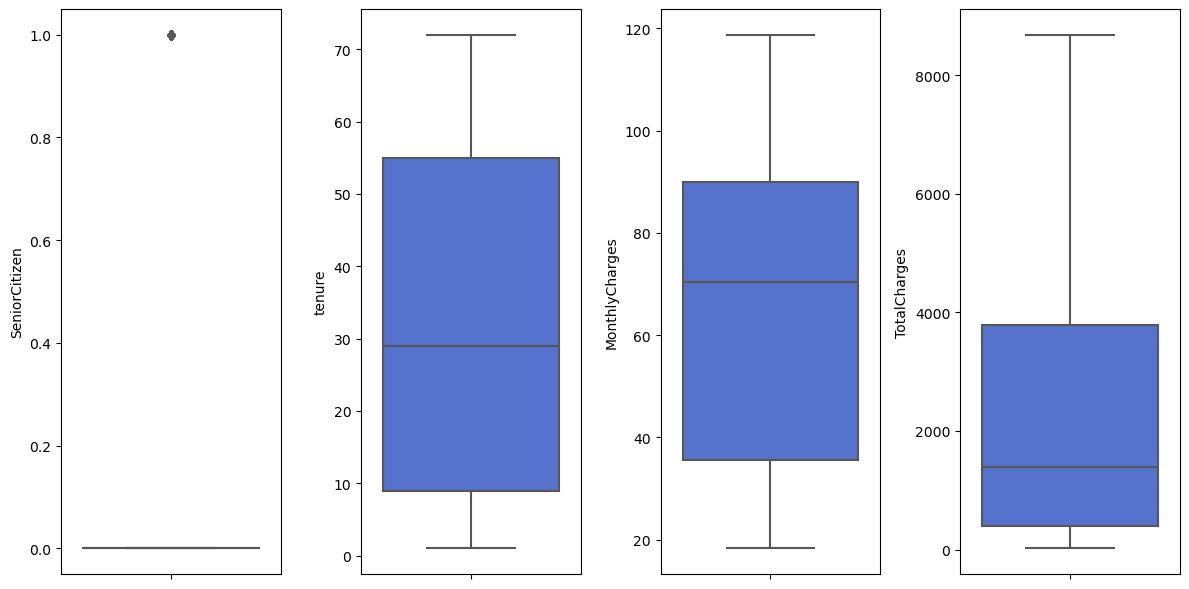

In [63]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='royalblue')
    plt.tight_layout()

Obervation:
* There is an outlier in the `SeniorCitizen` column (value = 1), but it doesn't need to be consider since the column is boolean
* Each column with continuous value  doesn't have outlier


## KDE plot for knowing the distribution form

C:\Users\aji\AppData\Local\Temp\ipykernel_5396\705230479.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\aji\AppData\Local\Temp\ipykernel_5396\705230479.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\aji\AppData\Local\Temp\ipykernel_5396\705230479.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


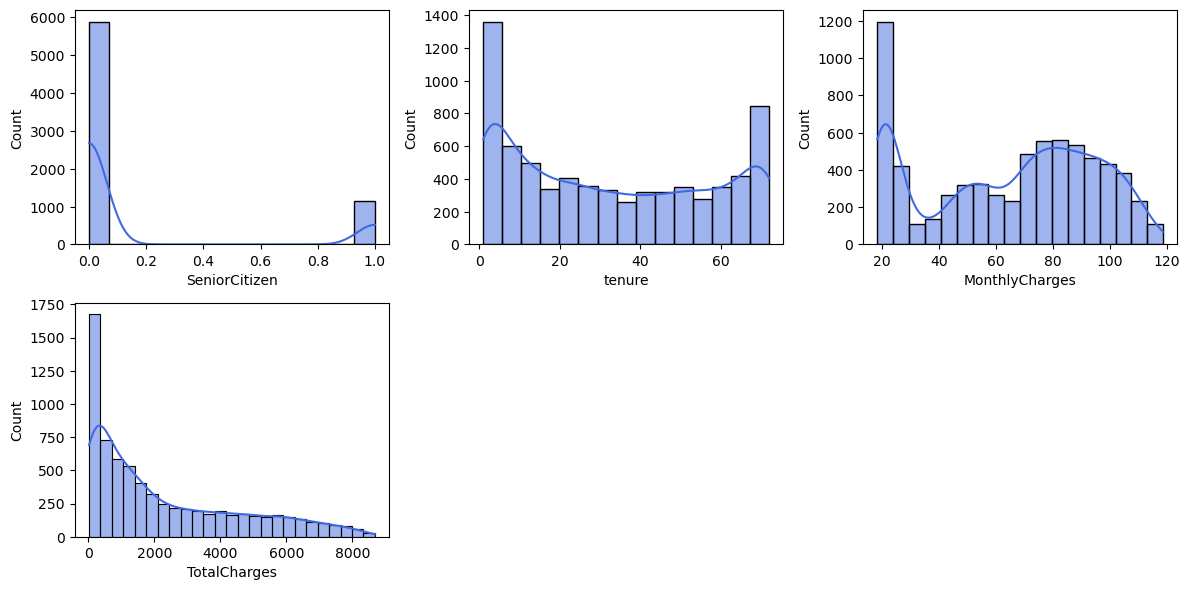

In [81]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='royalblue', kde='true')
    plt.xlabel(features[i])
    plt.tight_layout()
    #plt.show()

Observation:
* The continuous numeric features: `Tenure`, `MonthlyCharges`, and `TotalCharges` are slightly skew (we need to transform them to approximate normal distribution if we later want to do modelling)
* `SeniorCitizen = 0` is more frequent in the dataset. 

### Churn Distribution

<Axes: ylabel='count'>

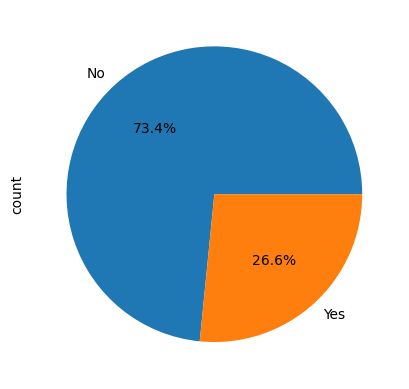

In [124]:
df["Churn"].value_counts().plot(kind="pie",autopct='%.1f%%')

# Bivariate Analysis

In [82]:
# remember the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

### Churn Affected by Demographic

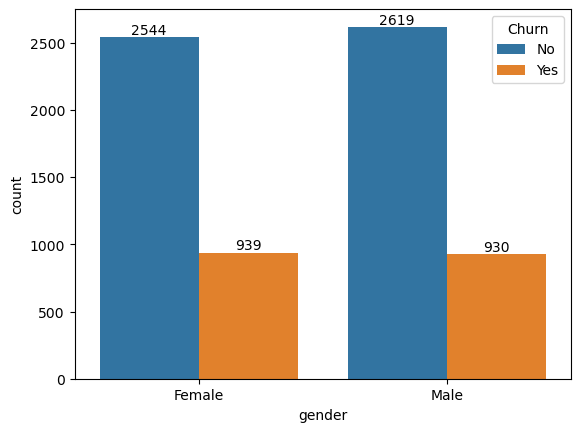

In [89]:
# gender affect Churn?
ax = sns.countplot(data=df,
            x='gender',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:

* Male have slightly higher tendency to churn than Female, but neither one is dominant

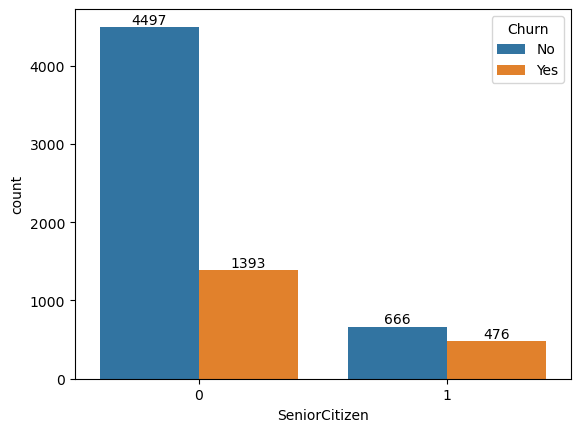

In [99]:
# SeniorCitizen affect Churn?
ax = sns.countplot(data=df,
            x='SeniorCitizen',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:

* Churn are dominated by non-senior
* Senior customers are more prone to churn

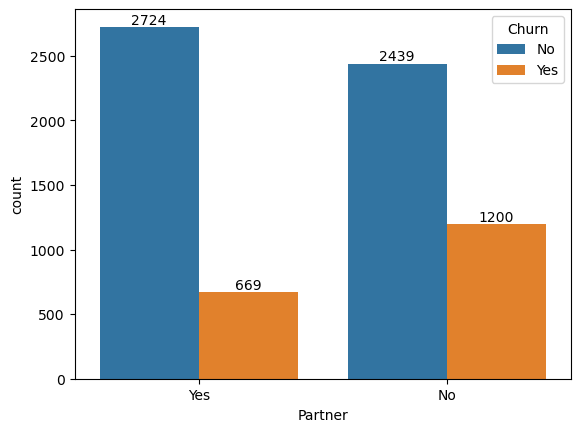

In [101]:
# Partner affect Churn?
ax = sns.countplot(data=df,
            x='Partner',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:

* Customer who don't have partner more have tendency to churn compare to those who do.


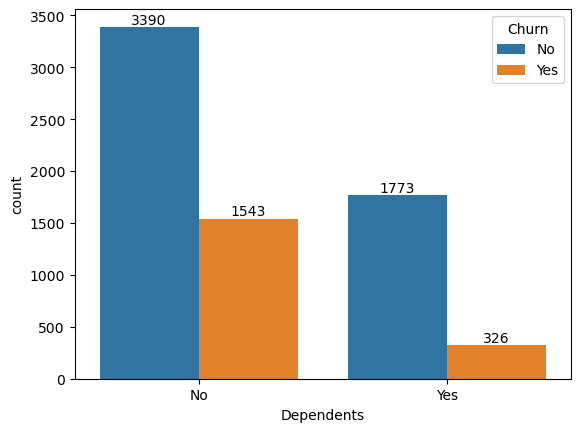

In [109]:
# Dependents affect Churn?
ax = sns.countplot(data=df,
            x='Dependents',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers who have no dependents left very significant. 
* On the other hand, those who have dependent will not show leave that much 

### Churn Affected by Services

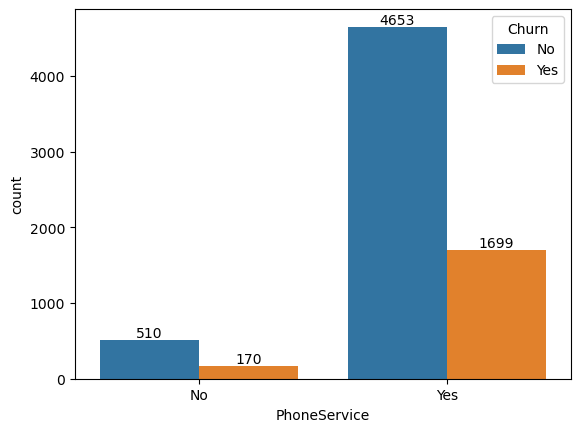

In [113]:
# PhoneService affect Churn?
ax = sns.countplot(data=df,
            x='PhoneService',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation
* Customers who use Phone Service have higher tendency to churn

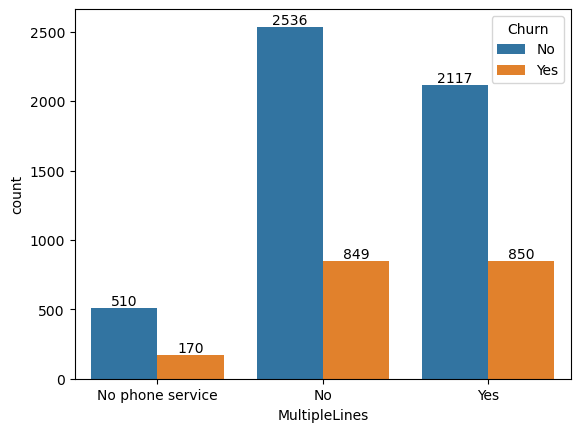

In [115]:
# MultipleLines  affect Churn?
ax = sns.countplot(data=df,
            x='MultipleLines',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customer who use Multiple Linees and don't use Multiple Line have approximately the same amount of those who churn

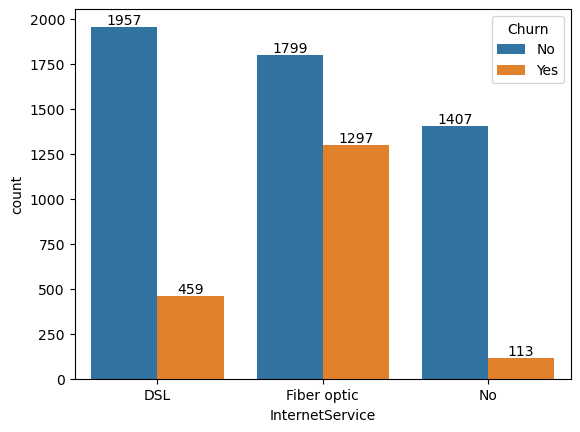

In [116]:
# InternetService  affect Churn?
ax = sns.countplot(data=df,
            x='InternetService',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers who use fiber optic as InternetService has the highest churn rate compared to the other method

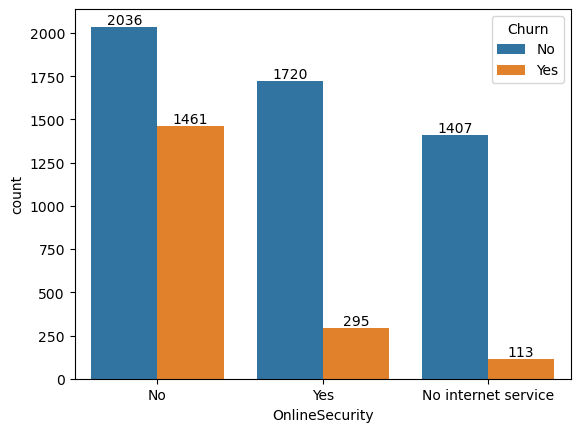

In [117]:
# OnlineSecurity affect Churn?
ax = sns.countplot(data=df,
            x='OnlineSecurity',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers with no OnlineSecurity show higher probability to churn compared to the other methods

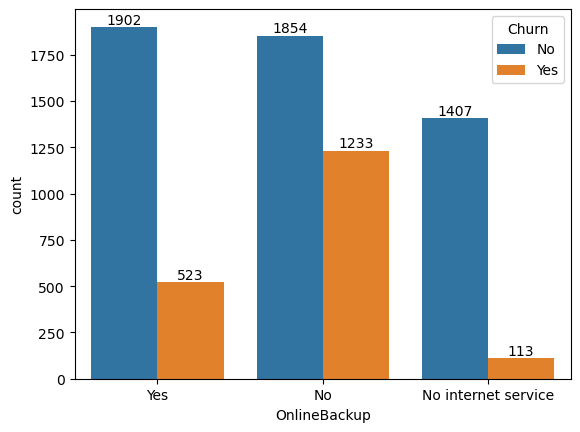

In [118]:
# OnlineBackup affect Churn?
ax = sns.countplot(data=df,
            x='OnlineBackup',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers with no Online Backup show higher probability to churn compared to the other methods

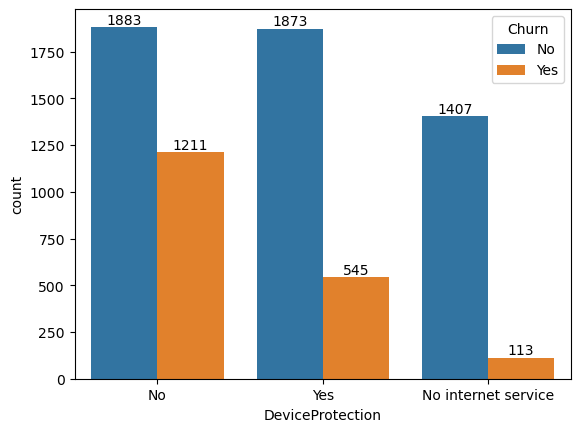

In [120]:
# DeviceProtection  affect Churn?
ax = sns.countplot(data=df,
            x='DeviceProtection',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers with no DeviceProtection show higher probability to churn compared to the other methods

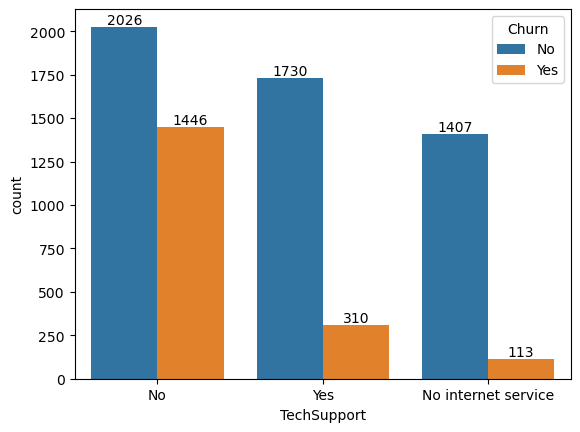

In [121]:
# TechSupport affect Churn?
ax = sns.countplot(data=df,
            x='TechSupport',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers with no TechSupport show higher probability to churn  compared to the other methods

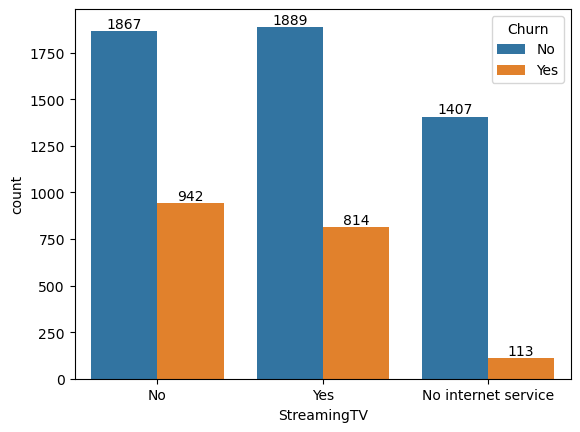

In [122]:
# StreamingTV affect Churn?
ax = sns.countplot(data=df,
            x='StreamingTV',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers who don't have Streaming TV have left very significant


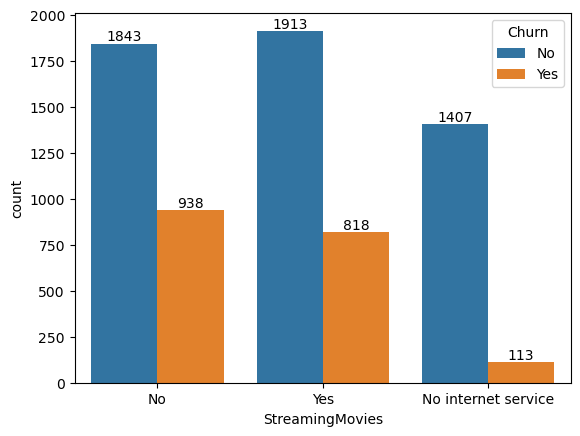

In [123]:
# StreamingMovies affect Churn?
ax = sns.countplot(data=df,
            x='StreamingMovies',
            hue='Churn'
            )
for container in ax.containers:
    ax.bar_label(container)

Observation:
* Customers who don't have Streaming Movies have left very significant

### Churn Affected by Financial Detail

C:\Users\aji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


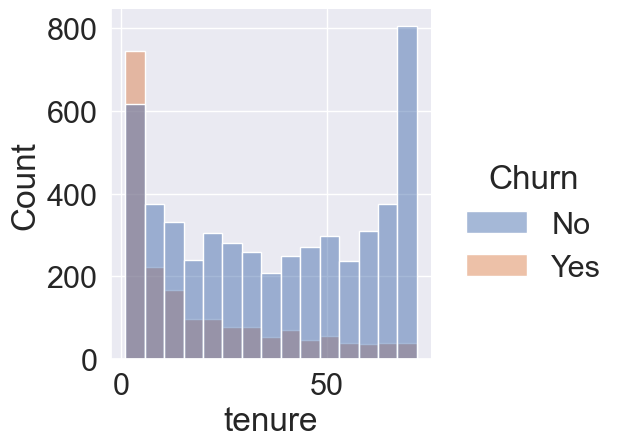

In [160]:
# MonthlyCharges
sns.displot(x=df['tenure'], hue=df['Churn'])


### Correlation Analysis

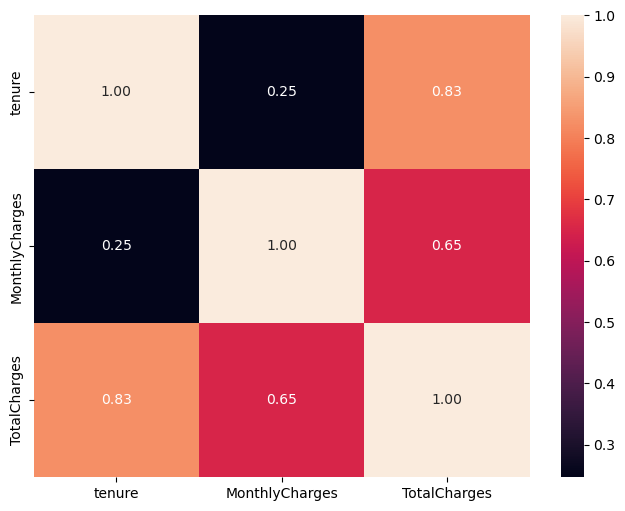

In [111]:
# correlation heatmap
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(8,6))
correlation = df[numeric].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

Observation:
* "TotalCharges" and "tenure" are highly correlated

C:\Users\aji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


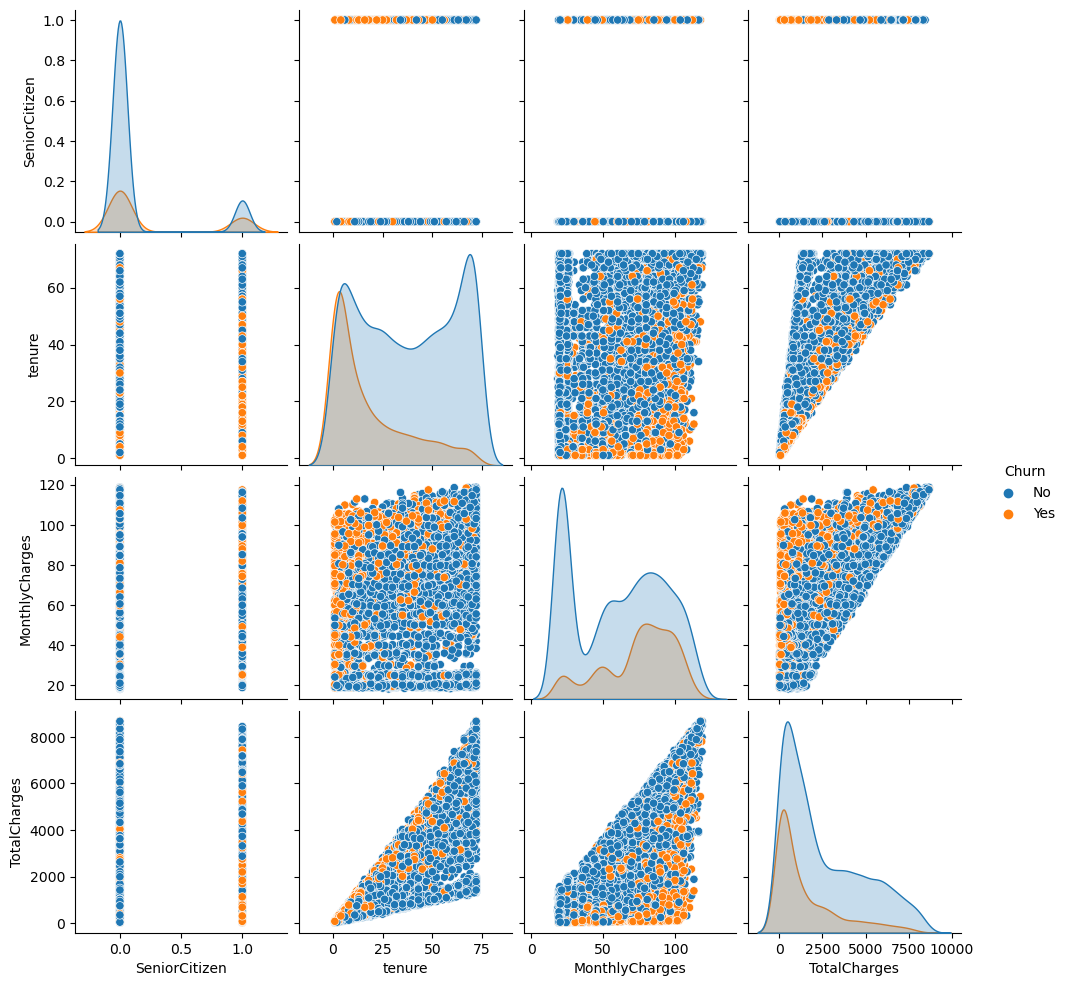

In [112]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

Observation
1. Left as exercise!

# EDA Conclusion
1. The data does not contain major issues. There are only some NULL values and duplicated rows. We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with continuous numerical values are somewhat symmetric already.
4. From the boxplot we can see outlier in `recommendation_strength` column. But it makes sense, because the min and max value are 1 and 5, the outlier is at "1", and it's possible (no need to drop)
5. In terms of the target variable, `admit_status = 1` is more frequent in the dataset. But, the imbalance condition is NOT severe (still OK)
6. From barcharts of `admit_status` and `research_exp` column,  We can say that, applicants with research experience is more likely to be admitted.
7. From correlation heatmap: We can see that `gre_score` is correlated with `gpa` and `toefl_score`. We can choose either of them for modelling.